In [1]:
# Support Vector Regression

In [2]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score, ShuffleSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings

In [3]:
data = pd.read_csv("C:/Users/Derya/Downloads/Team_Basketball.csv")
df = data.copy()
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"], axis=1).astype("float")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]], axis=1)
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.25,random_state=42)

In [4]:
from sklearn.svm import SVR

In [7]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [15]:
svr_model = SVR(kernel='linear').fit(X_train,y_train)

In [19]:
svr_model.predict(X_train)[:7]

array([403.52804878, 666.91219512, 706.66829268, 194.80853659,
       423.40609756, 666.91219512, 150.08292683])

In [20]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], svr_model.coef_[0][0])) 

y = -48.69756097561513 + 4.969512195122093 x


In [21]:
X_train["Hits"][0:1]

183    91.0
Name: Hits, dtype: float64

In [22]:
y_pred = svr_model.predict(X_train)

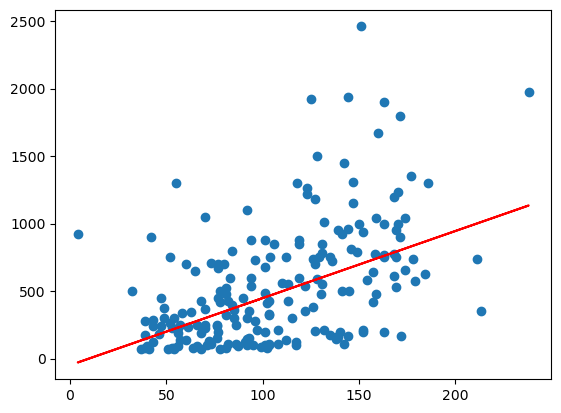

In [23]:
plt.scatter(X_train, y_train)
plt.plot(X_train,y_pred, color = "r")

In [24]:
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression().fit(X_train, y_train)
lm_pred  = lm_model.predict(X_train)
print("y = {0} + {1} x".format(lm_model.intercept_, lm_model.coef_[0]))

y = -8.814095480334572 + 5.1724561354706875 x


Text(0, 0.5, 'Salary')

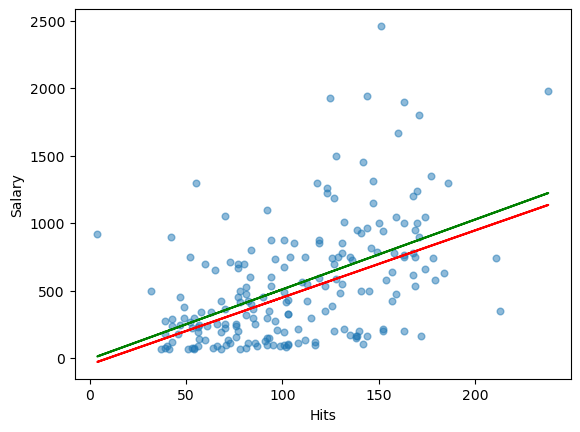

In [28]:
plt.scatter(X_train, y_train, alpha=0.5, s=23)
plt.plot(X_train, lm_pred, 'g')
plt.plot(X_train, y_pred, color='r')

plt.xlabel("Hits")
plt.ylabel("Salary")

In [29]:
# Prediction

In [30]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], svr_model.coef_[0][0])) 

y = -48.69756097561513 + 4.969512195122093 x


In [32]:
y_pred = svr_model.predict(X_test)

In [33]:
np.sqrt(mean_squared_error(y_test,y_pred))

459.0187960365147

In [35]:
# Model Tuning

In [45]:
svr_params = {"C":np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv=10).fit(X_train,y_train)

In [46]:
pd.Series(svr_cv_model.best_params_)[0]

0.1

In [47]:
svr_tuned = SVR(kernel="linear", C=pd.Series(svr_cv_model.best_params_)[0]).fit(X_train,y_train)

In [48]:
y_predict = svr_tuned.predict(X_test)

In [49]:
np.sqrt(mean_squared_error(y_test,y_predict))

458.198966781116

In [50]:
# NonLinear Support Vector Regression

In [51]:
np.random.seed(3)

x_sim = np.random.uniform(2, 10, 145)
y_sim = np.sin(x_sim) + np.random.normal(0, 0.4, 145)

x_outliers = np.arange(2.5, 5, 0.5)
y_outliers = -5*np.ones(5)

x_sim_idx = np.argsort(np.concatenate([x_sim, x_outliers]))
x_sim = np.concatenate([x_sim, x_outliers])[x_sim_idx]
y_sim = np.concatenate([y_sim, y_outliers])[x_sim_idx]

In [54]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(np.sin(x_sim[:, np.newaxis]), y_sim)
ols_pred = ols.predict(np.sin(x_sim[:, np.newaxis]))

from sklearn.svm import SVR

eps = 0.1
svr = SVR(kernel='rbf', epsilon = eps)            # radial basis function
svr.fit(x_sim[:, np.newaxis], y_sim)
svr_pred = svr.predict(x_sim[:, np.newaxis])

In [53]:
?SVR

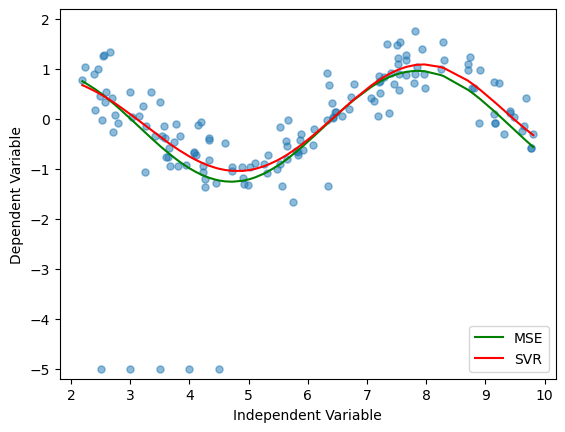

In [56]:
plt.scatter(x_sim, y_sim, alpha=0.5, s=26)
plt_ols, = plt.plot(x_sim, ols_pred, 'g')
plt_svr, = plt.plot(x_sim, svr_pred, color='r')
plt.xlabel("Independent Variable")
plt.ylabel("Dependent Variable")
plt.ylim(-5.2, 2.2)
plt.legend([plt_ols, plt_svr], ['MSE', 'SVR'], loc = 4);

In [59]:
hit = pd.read_csv("C:/Users/Derya/Downloads/Team_Basketball.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [61]:
svr_rbf =SVR(kernel="rbf").fit(X_train, y_train)

# Non Linaer SVR Prediction

In [89]:
y_predict = svr_rbf.predict(X_test)

In [90]:
np.sqrt(mean_squared_error(y_test,y_predict))

460.0032657244849

In [91]:
# Model Tuning

In [92]:
svr_params = {"C":[0.1,0.4,5,10,20,30,40,50]}
svr_cv_model = GridSearchCV(svr_rbf,svr_params,cv=10)

In [99]:
# svr_tuned = SVR(kernel="rbf", C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)


In [100]:
# np.sqrt(mean_squared_error(y_test, y_pred))